In [10]:
import matplotlib.pyplot as plt
import utils
import tensorflow.keras as keras

from tensorflow.keras.layers import *

%matplotlib inline

In [11]:
images = utils.get_data()

In [12]:
images.shape

(70000, 784)

In [13]:
images = images.reshape(-1,28,28,1)

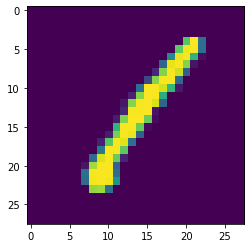

In [14]:
plt.imshow(images[0].reshape(28,28))

In [15]:
inputs = Input(shape=(28,28,1))

enc = Conv2D(32,3,activation="relu",padding="same")(inputs)
enc = MaxPool2D()(enc)
enc = Conv2D(48,3,activation="linear",padding="same")(enc)
enc = MaxPool2D()(enc)

dense = Flatten()(enc)
dense = Dense(256,activation="relu")(dense)
encodings = Dense(128,activation="linear")(dense)
dense = Dense(256,activation="relu")(encodings)
dense = Dense(1176)(dense)
dense = Reshape((7,7,24))(dense)

dec = UpSampling2D()(dense)
dec = BatchNormalization()(dec)
dec = Conv2D(48,3,activation="linear",padding="same")(dec)
dec = UpSampling2D()(dec)
dec = BatchNormalization()(dec)
dec = Conv2D(32,3,activation="relu",padding="same")(dec)
dec = Conv2D(1,4,activation="sigmoid",padding="same")(dec)

model = keras.Model(inputs,dec)
encoder = keras.Model(inputs,encodings)

In [16]:
model.load_weights("weights/models/conv_autoencoder/autoencoder")

In [17]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 48)        13872     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 48)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2352)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               6023

In [8]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 48)        13872     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 48)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2352)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               6023

In [ ]:
model.compile(optimizer="adam",loss='mse')
model.fit(images,images,batch_size=1,epochs=20)

Train on 70000 samples
Epoch 1/20


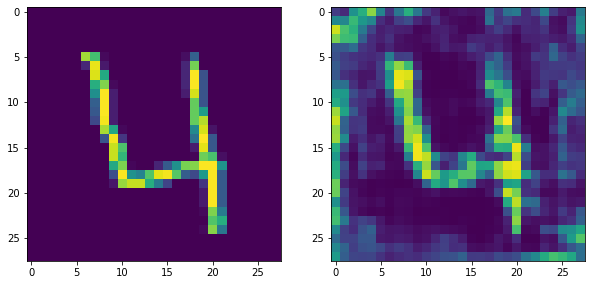

In [18]:
img = images[3].reshape(28,28)

pred = model.predict(img.reshape(1,28,28,1)).reshape(28,28)
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(img)
axes[1].imshow(pred)

In [11]:
model.save_weights("weights/models/conv_autoencoder/autoencoder")
encoder.save_weights("weights/models/conv_autoencoder/encoder")